In [134]:
import numpy as np
import PIL.Image as Image
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from readPatchOutput import *
np.set_printoptions(threshold=np.inf)

repeat = 8
dt = 0.125
n_pic = 6
nV1 = 1024
nblock = 5
nE = 768
pixel = '16'
Epick = []
Ipick = []
for i in range(nblock):
    for j in range(nV1):
        if j <nE:
            Epick.append(i*nV1+j)
        else:
            Ipick.append(i*nV1+j)

In [135]:
res_fdr = '/root/autodl-tmp/ljy/resource_repeat/'
setup_fdr = '/root/autodl-tmp/ljy/resource_repeat/'
data_fdr = '/root/autodl-tmp/ljy/data_repeat/'
output_suffix = 'repeat_'
nLGN = 512
nt = 8000
fr = []

for k in range(1,n_pic+1):
    #读取参数文件
    for i in range(1,repeat+1):
        with open(data_fdr+'sample_spikeCount_'+output_suffix+str(i)+'_'+str(k)+'.bin') as f:
            sampleSize = np.fromfile(f, 'u4', 1)[0] #一共5120
            sample_t0, sample_t1 = np.fromfile(f, 'f4', 2)#t0是开始时间，t1是结束时间，我一共跑了1s
            nt = np.fromfile(f, 'u4', 1)[0]
            nLGN = np.fromfile(f, 'u4', 1)[0]
            LGN_spike_time = np.fromfile(f, 'u4', nLGN*nt)
            sampleID = np.fromfile(f, 'u4', sampleSize)#id排序是顺序的
            sample_spikeCount = np.fromfile(f, 'u4', sampleSize)
            fr.append(sample_spikeCount)
            
            
        

In [136]:
fr = np.array(fr).reshape(n_pic, repeat, -1)/nt/dt*1000

In [137]:
fr_mean = np.mean(fr,axis=1)
fr_max = np.max(fr,axis=1)
fr_min = np.min(fr,axis=1)


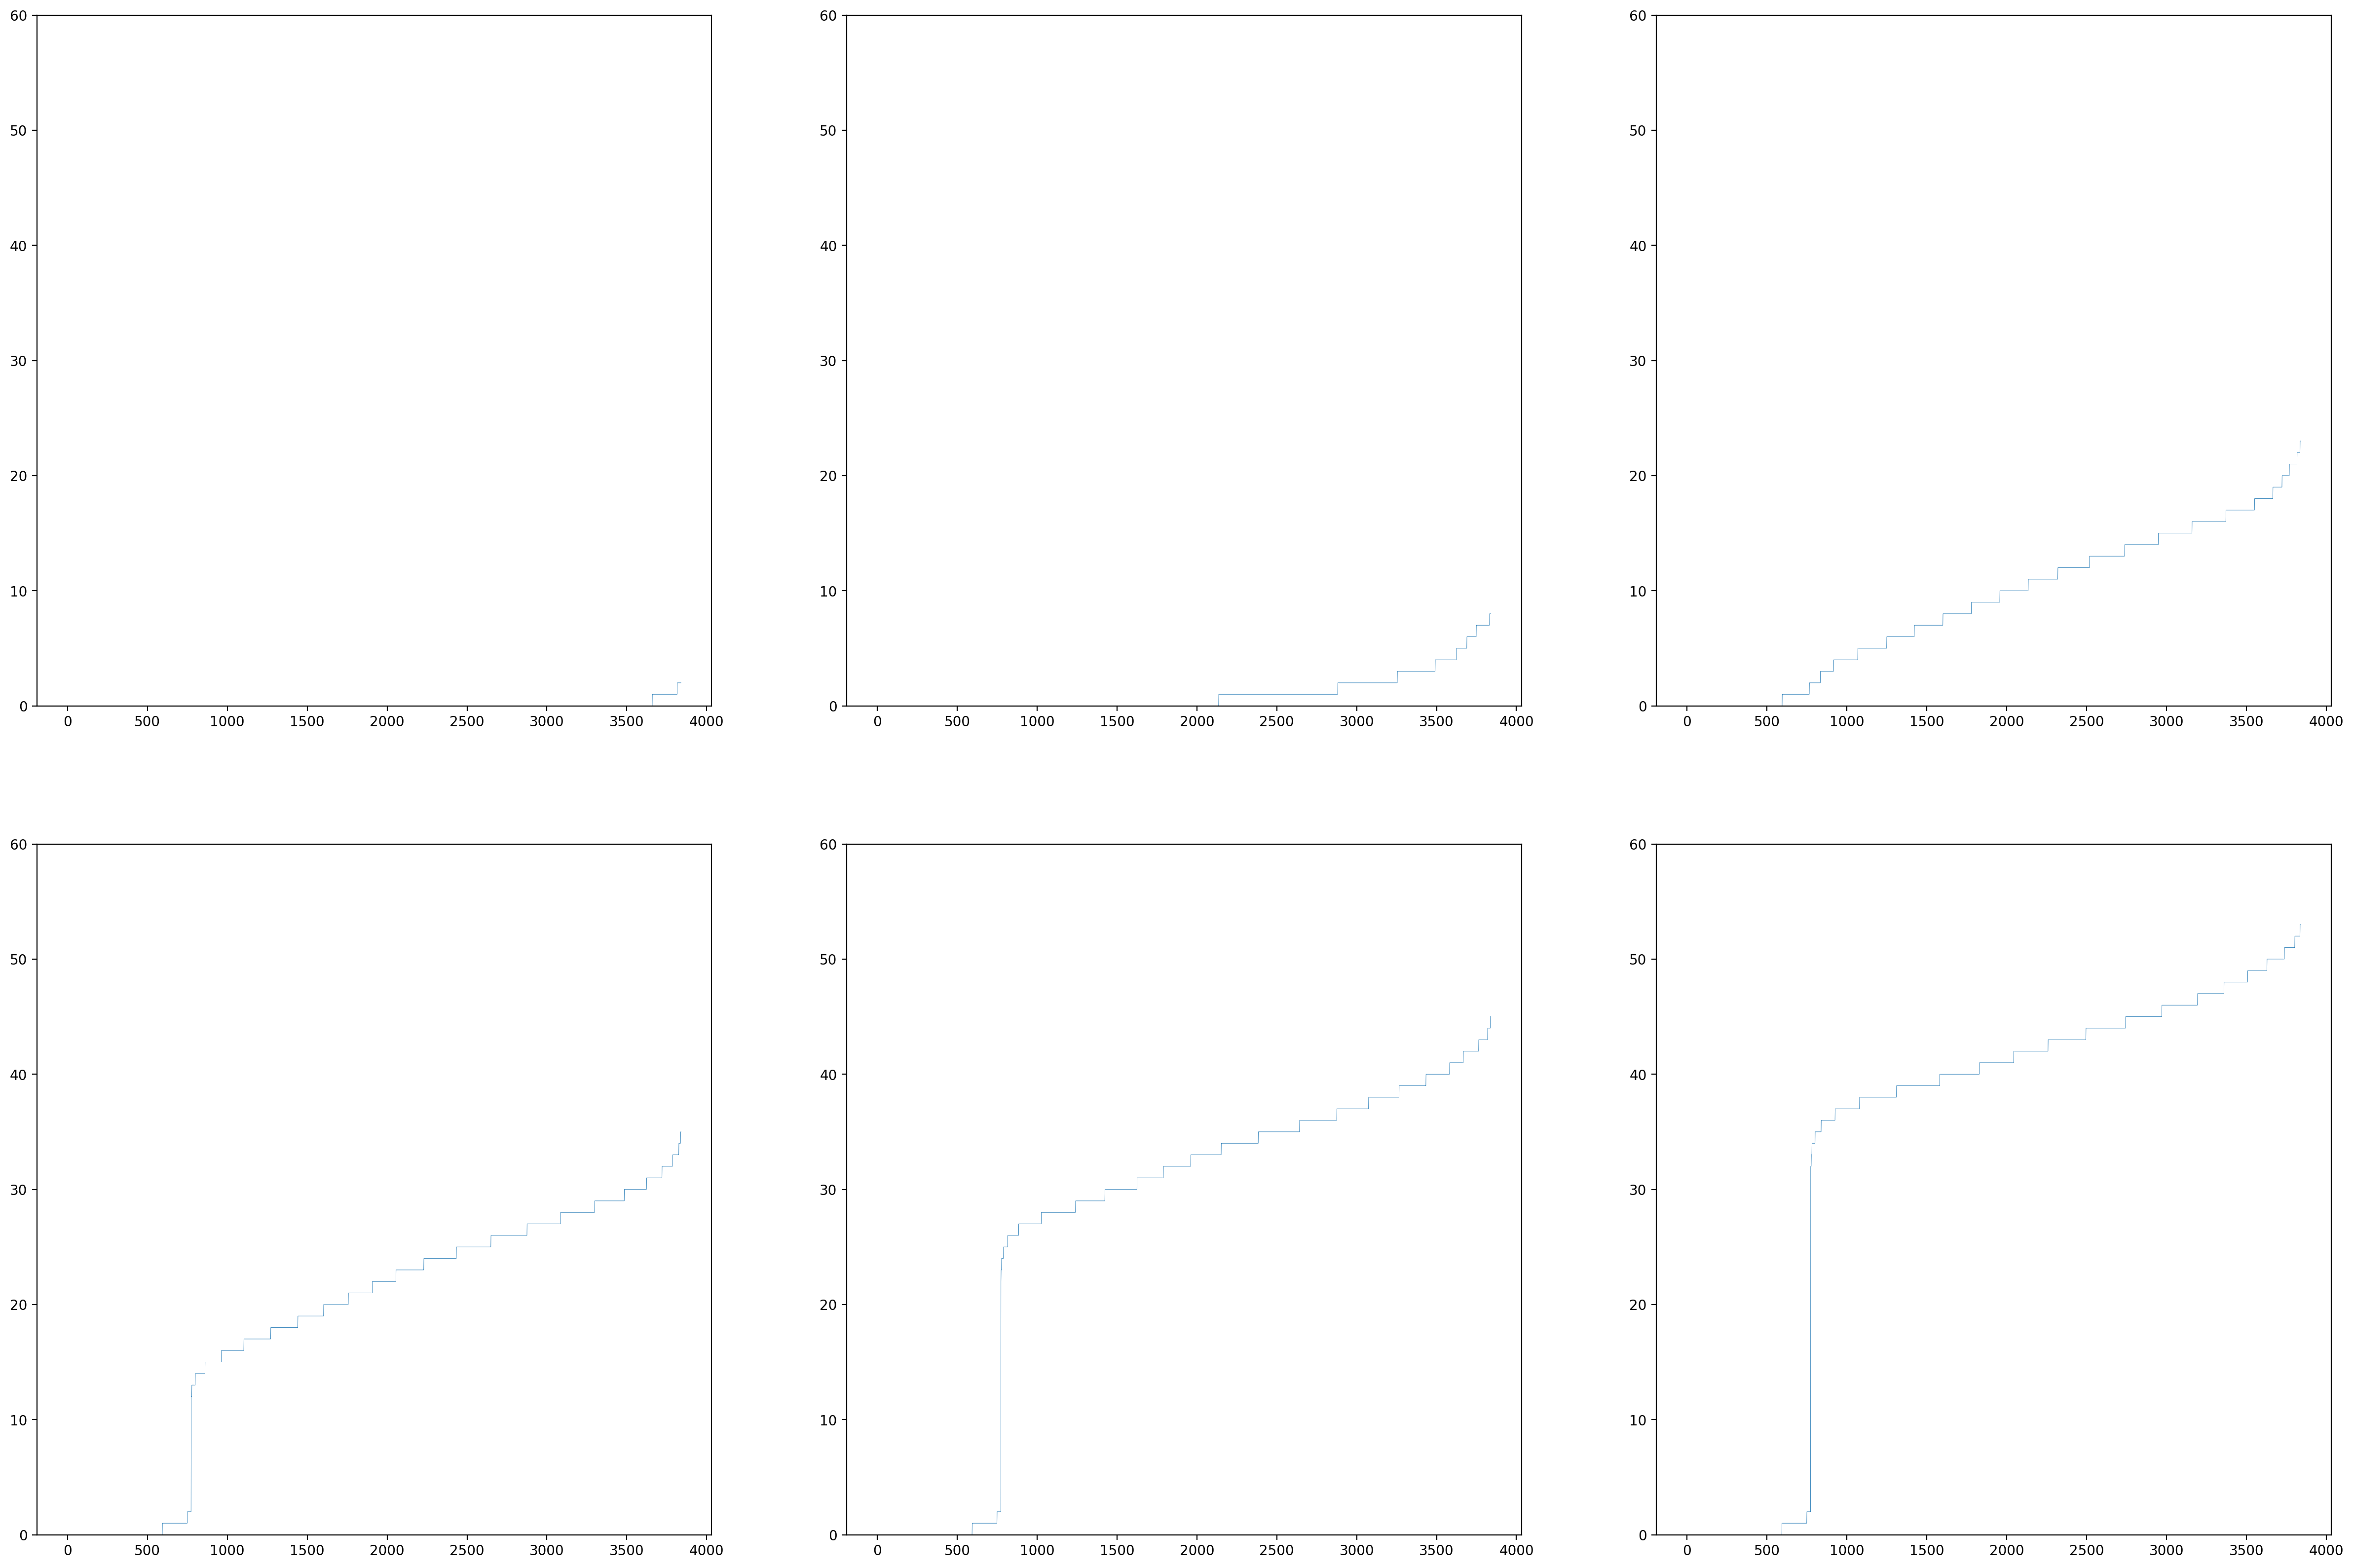

In [138]:
fig = plt.figure(figsize=(30,20),dpi=200)
for i in range(n_pic):
    tmp = np.concatenate((fr_mean[i].reshape(1,-1),fr_min[i].reshape(1,-1),fr_max[i].reshape(1,-1)), axis = 0)
    tmp = tmp.T
    tmp = list(tmp)
    tmp = sorted(tmp, key=lambda x:x[0])
    tmp = np.array(tmp).T
    ax = fig.add_subplot(2,3,i+1)
    plt.plot(np.arange(nE*nblock),tmp[0],linewidth=0.3)
    # plt.plot(np.arange(nE*nblock)[-100:],tmp[0][-100:],linewidth=0.3)
    # plt.plot(np.arange(nE*nblock)[1000:1100],tmp[0][1000:1100],linewidth=0.3)
    # plt.plot(np.arange(nE*nblock)[2000:2100],tmp[0][2000:2100],linewidth=0.3)
    
    # plt.scatter(np.arange(nE*nblock),tmp[1],s =1)
    # plt.scatter(np.arange(nE*nblock),tmp[2],s=1)
    plt.fill_between(np.arange(nE*nblock),tmp[1],tmp[2], color='r', alpha=.8, linewidth=0)
    # plt.fill_between(np.arange(nE*nblock)[1000:1100],tmp[1][1000:1100],tmp[2][1000:1100], color='r', alpha=.8, linewidth=0)
    # plt.fill_between(np.arange(nE*nblock)[2000:2100],tmp[1][2000:2100],tmp[2][2000:2100], color='r', alpha=.8, linewidth=0)
    plt.ylim([0,60])
plt.show()
# fig.savefig('./time_5.png')
plt.close()

In [139]:
tmp

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

In [86]:
tmp

[array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([0.